# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv("D:\Credit Card Project Dataset.csv")
df.head()

CUST_ID  AGE  GENDER  QUALIFICATION  FAMILY_STATUS  CC_LIMIT  APR_PAY  \
0    18064   56       2              1              1    242550       -1   
1    24524   36       2              1              1    110250       -2   
2    40165   26       1              1              2     88200        0   
3    18744   28       2              1              2    264600        0   
4    15813   36       1              2              2     55125       -2   

   MAY_PAY  JUN_PAY  JUL_PAY  ...  JUL_BILL  AUG_BILL  SEPT_BILL  APR_PAID  \
0       -1       -2       -2  ...      0.00      0.00       0.00    181.91   
1       -2        0        0  ...  27862.38  57013.58  104512.59      0.00   
2        0        0        0  ...  76661.24  85817.50   85330.19   1653.75   
3        0        0        0  ...  18416.16  32092.67   33265.73   4410.00   
4       -2        2        2  ...  54463.50  56152.53   51499.98      0.00   

   MAY_PAID  JUN_PAID  JUL_PAID  AUG_PAID  SEPT_PAID  TARGET_DEFAULT  
0    330.75   6492.62      0.00      0.00       0.00               0  
1      0.00      0.00      0.00   1102.50    2892.96               0  
2   2553.39   1671.39   1314.18   3099.13    3669.12               0  
3   2756.25      0.00   3865.36   4410.00    5522.42               0  
4      0.00      0.00   2205.00      0.00    5512.50               0  

[5 rows x 25 columns]

# Number of rows and columns

In [3]:
print(f'Number  of rows= {df.shape[0]}')
print(f'Number  of columns= {df.shape[1]}')

Number  of rows= 10000
Number  of columns= 25


# Checking null values

In [4]:
df.isnull().sum()      #No null values

CUST_ID           0
AGE               0
GENDER            0
QUALIFICATION     0
FAMILY_STATUS     0
CC_LIMIT          0
APR_PAY           0
MAY_PAY           0
JUN_PAY           0
JUL_PAY           0
AUG_PAY           0
SEPT_PAY          0
APR_BILL          0
MAY_BILL          0
JUN_BILL          0
JUL_BILL          0
AUG_BILL          0
SEPT_BILL         0
APR_PAID          0
MAY_PAID          0
JUN_PAID          0
JUL_PAID          0
AUG_PAID          0
SEPT_PAID         0
TARGET_DEFAULT    0
dtype: int64

During Research and Data Cleaning we have already done the basic EDA of this dataset. Now , we will be focusing on each
parameter and their data visualisations and correlation between these variables.

Data Description:

1.	CUST_ID: Unique customer ID number
2.	AGE: Age of the customer
3.	GENDER: Gender of the customer (1 = male, 2 = female)
4.	QUALIFICATION: Educational qualification of the customer (1 = high school, 2 = graduate, 3 = postgraduate, 4 = Others)
5.	FAMILY_STATUS: Marital status of the customer (1 = married, 2 = single, 3 = Others)
6.	CC_LIMIT: Credit card limit assigned to the customer
7.	APR_PAY - SEPT_PAY: Repayment status of the customer's credit card balance for each month from April to September (-2 = no consumption, -1 = paid in full, 0 = use of revolving credit, 1 = payment delay for one month, 2 = payment delay for two months, and so on)
8.	APR_BILL - SEPT_BILL: Amount of bill statement for each month from April to September
9.	APR_PAID - SEPT_PAID: Amount of payment made by the customer for each month from April to September
10.	TARGET_DEFAULT: Target variable indicating whether the customer defaulted on their credit card payment (1 = defaulted, 0 = not defaulted)

In [5]:
#Converting categorical variables datatype to string
df[['CUST_ID','QUALIFICATION','TARGET_DEFAULT','GENDER', 'FAMILY_STATUS',
    'APR_PAY', 'MAY_PAY', 'JUN_PAY', 'JUL_PAY', 'AUG_PAY',
    'SEPT_PAY']]=df[['CUST_ID','QUALIFICATION','TARGET_DEFAULT','GENDER', 'FAMILY_STATUS',
    'APR_PAY', 'MAY_PAY', 'JUN_PAY', 'JUL_PAY', 'AUG_PAY','SEPT_PAY']].astype(str)

# AGE AND GENDER

In [6]:
df['AGE'].describe()

count    10000.000000
mean        35.531000
std          9.234076
min         21.000000
25%         28.000000
50%         34.000000
75%         42.000000
max         75.000000
Name: AGE, dtype: float64

In [7]:
fig=px.histogram(df,x='AGE',color='GENDER')
fig.show()

As we can see here the most common age is age 29 and from that age number of credit card customers are declining. The distribution plot shows that there are more female customers than male customers

In [8]:
df['GENDER'].value_counts()

2    6017
1    3983
Name: GENDER, dtype: int64

In [9]:
fig=px.histogram(df,x='GENDER')
fig.show()

# CREDIT CARD LIMIT

In [10]:
df['CC_LIMIT'].describe()

count     10000.000000
mean     184810.972500
std      142715.991271
min       11025.000000
25%       55125.000000
50%      154350.000000
75%      264600.000000
max      882000.000000
Name: CC_LIMIT, dtype: float64

In [11]:
df_mode=stats.mode(df['CC_LIMIT'])
print('Mode=',df_mode)

Mode= ModeResult(mode=array([55125], dtype=int64), count=array([1160]))


In [12]:
df_median=np.median(df['CC_LIMIT'])
print('Median=',df_median)

Median= 154350.0


In [13]:
df['CC_LIMIT'].corr(df['AGE'])  #Credit card limit and age do not have a strong correlation

0.14150154283311997

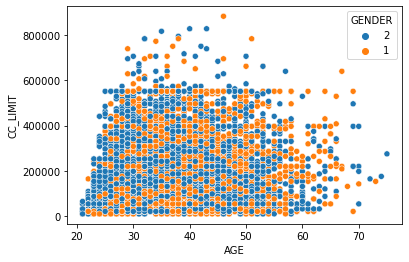

In [14]:
sns.scatterplot(data=df,x='AGE',y='CC_LIMIT',hue='GENDER')
plt.show()

In [15]:
#As we can see that most customers with a significant credit card limit lie in the range 20-60 and orange color dots show 
#male customers whereas blue dots show female customers 

In [16]:
df['FAMILY_STATUS'].value_counts()

2    5298
1    4583
3     102
0      17
Name: FAMILY_STATUS, dtype: int64

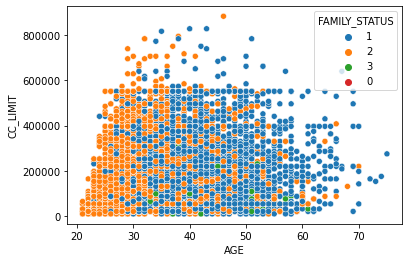

In [17]:
sns.scatterplot(data=df,x='AGE',y='CC_LIMIT',hue='FAMILY_STATUS')
plt.show()

In [18]:
#As we can see here most of the customers are single and they are mostly concentrated in the 20-30 age bracket 

In [19]:
df['QUALIFICATION'].value_counts()

2    4674
1    3510
3    1652
5      87
4      53
6      17
0       7
Name: QUALIFICATION, dtype: int64

In [20]:
#Most of the credit card customers are graduate and second highest demographic is of people who are high school passouts

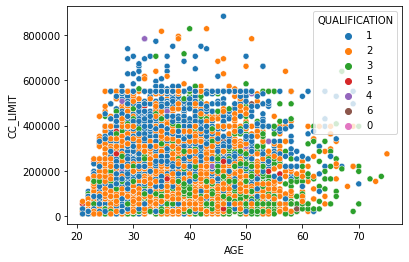

In [21]:
sns.scatterplot(data=df,x='AGE',y='CC_LIMIT',hue='QUALIFICATION')
plt.show()

In [22]:
fig=px.histogram(df,x='QUALIFICATION',y='CC_LIMIT')
fig.show()

# PAYMENT STATUS OF CREDIT CARD HOLDERS

<AxesSubplot:ylabel='APR_PAY'>

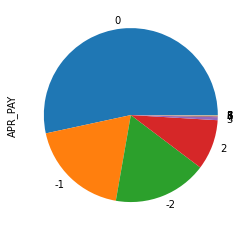

In [23]:
df['APR_PAY'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='MAY_PAY'>

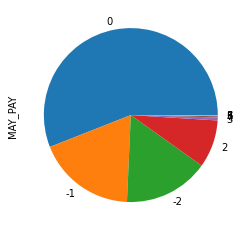

In [24]:
df['MAY_PAY'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='JUN_PAY'>

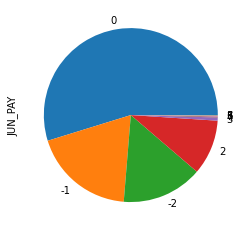

In [25]:
df['JUN_PAY'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='JUL_PAY'>

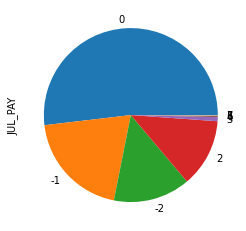

In [26]:
df['JUL_PAY'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='AUG_PAY'>

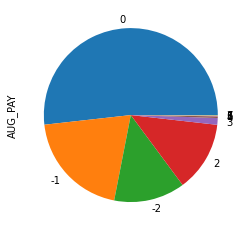

In [27]:
df['AUG_PAY'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='SEPT_PAY'>

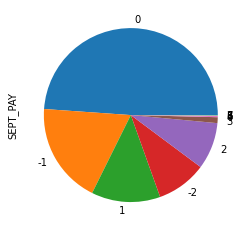

In [28]:
df['SEPT_PAY'].value_counts().plot(kind='pie')

In [29]:
#A signifiacnt portion of each pie chart is blue which shows most customers use revolving credit and the orange portion shows
#the customers who have paid in full and we can see most of the defaulters have delayed the bill by either one month or two
#months maximum except for a few exceptions. The red portion are the customers who have no consumption. 

# Monthly Bills

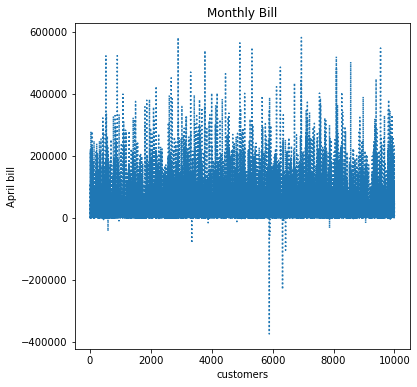

In [30]:
plt.figure(figsize=(6,6))
plt.title('Monthly Bill')
plt.xlabel('customers')
plt.ylabel('April bill')
plt.plot(df['APR_BILL'],linestyle='dotted')
plt.show()

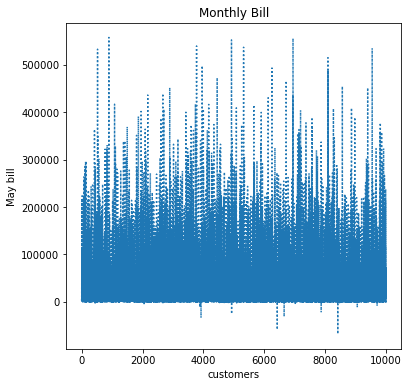

In [31]:
plt.figure(figsize=(6,6))
plt.title('Monthly Bill')
plt.xlabel('customers')
plt.ylabel('May bill')
plt.plot(df['MAY_BILL'],linestyle='dotted')
plt.show()

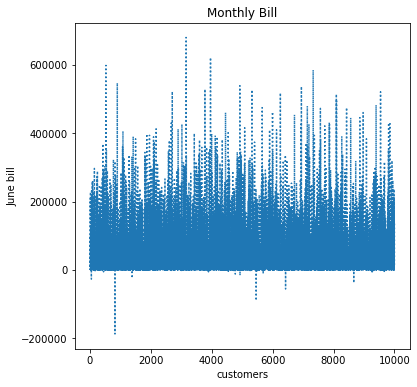

In [32]:
plt.figure(figsize=(6,6))
plt.title('Monthly Bill')
plt.xlabel('customers')
plt.ylabel('June bill')
plt.plot(df['JUN_BILL'],linestyle='dotted')
plt.show()

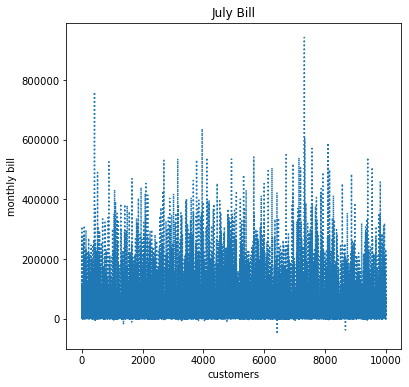

In [33]:
plt.figure(figsize=(6,6))
plt.title('July Bill')
plt.xlabel('customers')
plt.ylabel('monthly bill')
plt.plot(df['JUL_BILL'],linestyle='dotted')
plt.show()

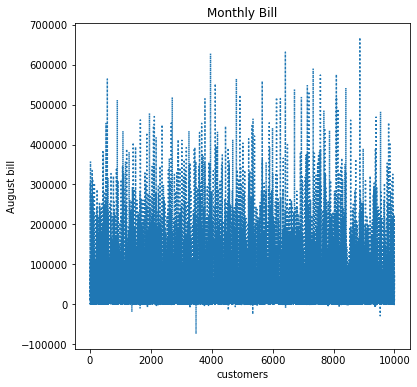

In [34]:
plt.figure(figsize=(6,6))
plt.title('Monthly Bill')
plt.xlabel('customers')
plt.ylabel('August bill')
plt.plot(df['AUG_BILL'],linestyle='dotted')
plt.show()

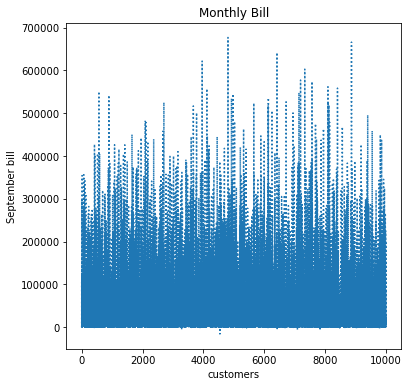

In [35]:
plt.figure(figsize=(6,6))
plt.title('Monthly Bill')
plt.xlabel('customers')
plt.ylabel('September bill')
plt.plot(df['SEPT_BILL'],linestyle='dotted')
plt.show()

# MONTHLY PAYMENTS

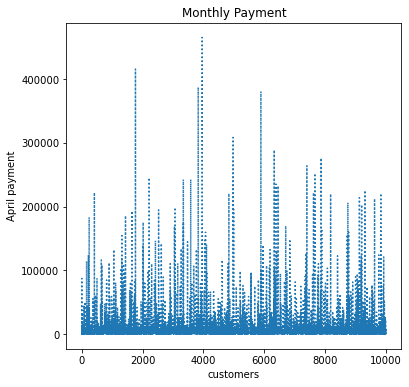

In [36]:
plt.figure(figsize=(6,6))
plt.title('Monthly Payment')
plt.xlabel('customers')
plt.ylabel('April payment')
plt.plot(df['APR_PAID'],linestyle='dotted')
plt.show()

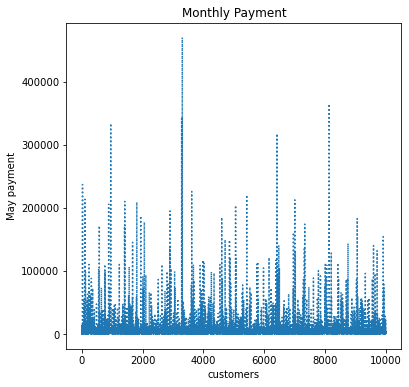

In [37]:
plt.figure(figsize=(6,6))
plt.title('Monthly Payment')
plt.xlabel('customers')
plt.ylabel('May payment')
plt.plot(df['MAY_PAID'],linestyle='dotted')
plt.show()

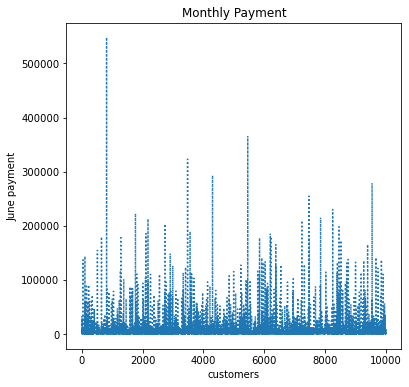

In [38]:
plt.figure(figsize=(6,6))
plt.title('Monthly Payment')
plt.xlabel('customers')
plt.ylabel('June payment')
plt.plot(df['JUN_PAID'],linestyle='dotted')
plt.show()

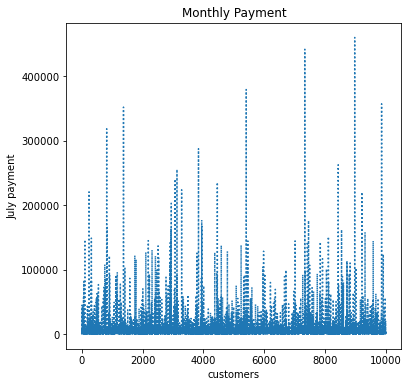

In [39]:
plt.figure(figsize=(6,6))
plt.title('Monthly Payment')
plt.xlabel('customers')
plt.ylabel('July payment')
plt.plot(df['JUL_PAID'],linestyle='dotted')
plt.show()

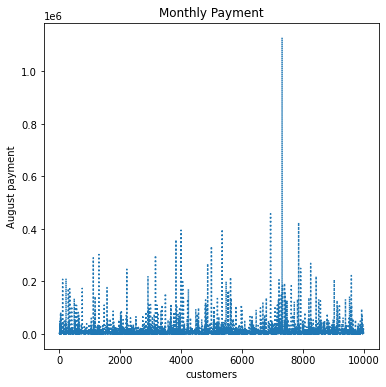

In [40]:
plt.figure(figsize=(6,6))
plt.title('Monthly Payment')
plt.xlabel('customers')
plt.ylabel('August payment')
plt.plot(df['AUG_PAID'],linestyle='dotted')
plt.show()

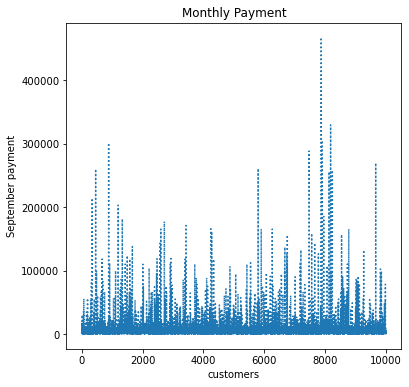

In [41]:
plt.figure(figsize=(6,6))
plt.title('Monthly Payment')
plt.xlabel('customers')
plt.ylabel('September payment')
plt.plot(df['SEPT_PAID'],linestyle='dotted')
plt.show()

In [42]:
df.head()

CUST_ID  AGE GENDER QUALIFICATION FAMILY_STATUS  CC_LIMIT APR_PAY MAY_PAY  \
0   18064   56      2             1             1    242550      -1      -1   
1   24524   36      2             1             1    110250      -2      -2   
2   40165   26      1             1             2     88200       0       0   
3   18744   28      2             1             2    264600       0       0   
4   15813   36      1             2             2     55125      -2      -2   

  JUN_PAY JUL_PAY  ...  JUL_BILL  AUG_BILL  SEPT_BILL  APR_PAID  MAY_PAID  \
0      -2      -2  ...      0.00      0.00       0.00    181.91    330.75   
1       0       0  ...  27862.38  57013.58  104512.59      0.00      0.00   
2       0       0  ...  76661.24  85817.50   85330.19   1653.75   2553.39   
3       0       0  ...  18416.16  32092.67   33265.73   4410.00   2756.25   
4       2       2  ...  54463.50  56152.53   51499.98      0.00      0.00   

   JUN_PAID  JUL_PAID  AUG_PAID  SEPT_PAID  TARGET_DEFAULT  
0   6492.62      0.00      0.00       0.00               0  
1      0.00      0.00   1102.50    2892.96               0  
2   1671.39   1314.18   3099.13    3669.12               0  
3      0.00   3865.36   4410.00    5522.42               0  
4      0.00   2205.00      0.00    5512.50               0  

[5 rows x 25 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CUST_ID         10000 non-null  object 
 1   AGE             10000 non-null  int64  
 2   GENDER          10000 non-null  object 
 3   QUALIFICATION   10000 non-null  object 
 4   FAMILY_STATUS   10000 non-null  object 
 5   CC_LIMIT        10000 non-null  int64  
 6   APR_PAY         10000 non-null  object 
 7   MAY_PAY         10000 non-null  object 
 8   JUN_PAY         10000 non-null  object 
 9   JUL_PAY         10000 non-null  object 
 10  AUG_PAY         10000 non-null  object 
 11  SEPT_PAY        10000 non-null  object 
 12  APR_BILL        10000 non-null  float64
 13  MAY_BILL        10000 non-null  float64
 14  JUN_BILL        10000 non-null  float64
 15  JUL_BILL        10000 non-null  float64
 16  AUG_BILL        10000 non-null  float64
 17  SEPT_BILL       10000 non-null  

In [45]:
df.to_csv('clean_data.csv',index=False)


In [46]:
import os
os.getcwd()

'C:\\Users\\Lenovo'